### Analysis of a Combined E-commerce Dataset

We have been provided with a consolidated e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the product they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the helpfulness of the rating (on a scale of 1-5).

Initially, this information was scattered across several separate files, each recording specific aspects such as user-item rating information, user demographic details, and descriptive information about the items. However, we have performed preliminary processing to map and merge all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this consolidated file is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items and a same item may receive ratings and reviews from multiple users.

There are four questions to explore with the data as shown below.


<img src="Fig2.png" width="800"/>




 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
origin_df = pd.read_csv('The E-commerce Dataset.csv')

In [3]:
origin_df.info()
origin_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
origin_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [6]:
print('the length before removing missing data is ', len(origin_df))

the length before removing missing data is  20000


In [7]:

#1st method
#clean_df_occ = origin_df.drop(origin_df.index[(origin_df['review'] == 'none')])
#print('the length after removing none data is ', len(clean_df_occ))
#clean_df=clean_df_occ.dropna()
#print('the length after removing missing data is ', len(clean_df))

#2nd method
clean_df_occ = origin_df
count=0
for index, row in origin_df.iterrows():
    if row ['review'] == 'none':
        clean_df_occ = clean_df_occ.drop([index])
        count+=1
print(count) 

clean_df=clean_df_occ.dropna()
print('the length after removing none data is ', len(clean_df_occ))
print('the length after removing missing data is ', len(clean_df))



18
the length after removing none data is  19982
the length after removing missing data is  19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [8]:
# Q2.1
user_array = clean_df['userId'].unique()
print('the number of unique users is ', user_array.size)

occupation_array = clean_df['review'].unique()
print('the number of unique review is ',occupation_array.size)

movie_array = clean_df['item'].unique()
print('the number of unique item is ', movie_array.size)

genre_array = clean_df['category'].unique()
print('the number of unique category is ', genre_array.size)

#alternative solution: remove duplicates for users and items;

the number of unique users is  8562
the number of unique review is  19459
the number of unique item is  89
the number of unique category is  9


In [9]:
# Q2.2
clean_df['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
# Q2.3 group users by their genders and then count the number of items rated by each gender
gender_item_num = clean_df.groupby(['gender'])['item'].count().reset_index(name='count')
gender_item_num.head()

,gender,count
0,F,9793
1,M,10123


In [11]:
gender_item_num['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [12]:
# Q2.4 group items by their names and then count the number of users rated the item
rated_item_num = clean_df.groupby(['item'])['rating'].count().reset_index(name='count')
rated_item_num.head()

,item,count
0,AOL (America Online),939
1,All Advantage,657
2,Alta Vista (by 1stUp),157
3,Amazon.com,240
4,American Airlines,185


In [13]:
rated_item_num['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

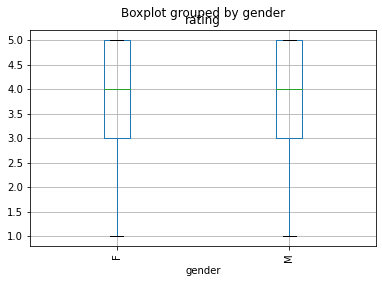

In [14]:
# gender-rating correlation
clean_df.boxplot("rating", by="gender")
plt.xticks(rotation=90)

### Analysis and Observation

_Below only shows several possible observations as examples. You may have more different ones._ 

- The rating distribution regarding female and male users are quite similar
- The gender info does not affect the ratings too much 


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0')])

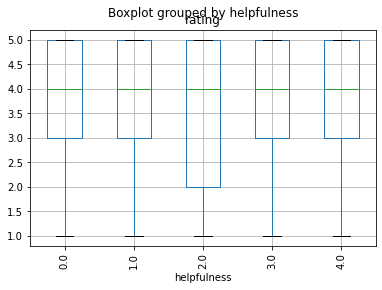

In [15]:
# helpfulness-rating correlation
clean_df.boxplot("rating", by="helpfulness")
plt.xticks(rotation=90)

### Analysis and Observation

_Below only shows several possible observations as examples. You may have more different ones._ 

- Overall, the rating distribution regarding majority helpfulness is similar, except for the helpfulness with the value of 2.
- The helpfulness with the value of 2 possesses larger variance w.r.t. ratings, and its min rating is 2, which is different from the helpfulness with other values (smaller variance) 
- The impact of helpfulness on ratings is larger than gender.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

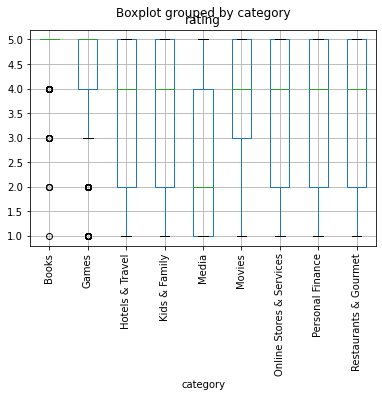

In [16]:
# category-rating correlation
clean_df.boxplot("rating", by="category")
plt.xticks(rotation=90)

### Analysis and Observation

_Below only shows several possible observations as examples. You may have more different ones._ 

- Overall, the rating distribution regarding the majority category is quite similar
- Items with category Media tend to receive lower ratings than those with other categories
- Items with category Game possess smaller variance w.r.t. ratings, and their min ratings are 4, which is different from items with other categories (larger variance and min ratings lower than 4) 
- The impact of the category is also larger than that of genders on ratings. However, the impact is quite limited. 

### Summary of the Data

_Below only shows possible data summary as examples. You may have more different ones._

- The dataset contains 19,916 unique users' ratings towards 89 unique items, where the ratings range from 1 to 5 scaled by 1; and the mean rating is around 3.7; and more than 50% of records have ratings no less than 4;
- Users in the dataset come from 2 different genders; and each gender has rated 9958 items averagely;
- Items in the dataset belong to 9 different categories; and each item has received 223 ratings averagely;
- The features, i.e., gender and category are less correlated with ratings; where gender holds the worst case; this indicates it is not easy to infer rating with these features.
- The dataset contains a small number of missing values, around 84 records.



#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules:

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [17]:
# the reviews of which the helpfulness is no more than 2
remove_outlier_df = clean_df.drop(clean_df.index[(clean_df['helpfulness'] <= 2)])
print('the length of data after removing outlier helpfulness ', len(remove_outlier_df))

the length of data after removing outlier helpfulness  13643


In [18]:
# group users by their ids and count the number of their ratings 
group_user_df = remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name= 'count')
print('the number of user after removing outlier helpfulness', len(group_user_df))

the number of user after removing outlier helpfulness 6535


In [19]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [20]:
# get the ids of users who have rated no less than 7 items
userIds = group_user_df[group_user_df['count'] >= 7]['userId'].tolist()
print(len(userIds))

267


In [21]:
# filter users who have rated less than 7 items
remove_outlier_df = remove_outlier_df[remove_outlier_df['userId'].isin(userIds)]

In [22]:
print('the length of data is', len(remove_outlier_df))

the length of data is 2741


In [23]:
# group items by their names and count the number of their ratings 
group_item_df = remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name= 'count')
group_item_df.head()

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [24]:
# get the names of items that have received no less than 11 ratings
items = group_item_df[group_item_df['count'] >= 11]['item'].tolist()
print(len(items))

82


In [25]:
# filter items that have received less than 11 ratings
remove_outlier_df = remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2685

In [26]:
# export the processed data as csv file
remove_outlier_df.to_csv('A combined dataset from ecommerce dataset_cleaned_data.csv', index=False)